<h3>Однофакторний дисперсійний аналіз</h3>

Розглянутий раніше <b>t-критерій Стьюдента</b> (як і його непараметричні аналоги) призначений порівняння виключно <b>двох сукупностей</b>. У такому разі ми можемо застосовувати однофакторний дисперсійний аналіз. Та змінна, яка розділятиме наших випробуваних або спостереження на групи (номінативна змінна з кількома градаціями) називається <b>незалежною змінною</b>. А та кількісна змінна, за рівнем виразності якої ми порівнюємо групи, називається залежною змінною.

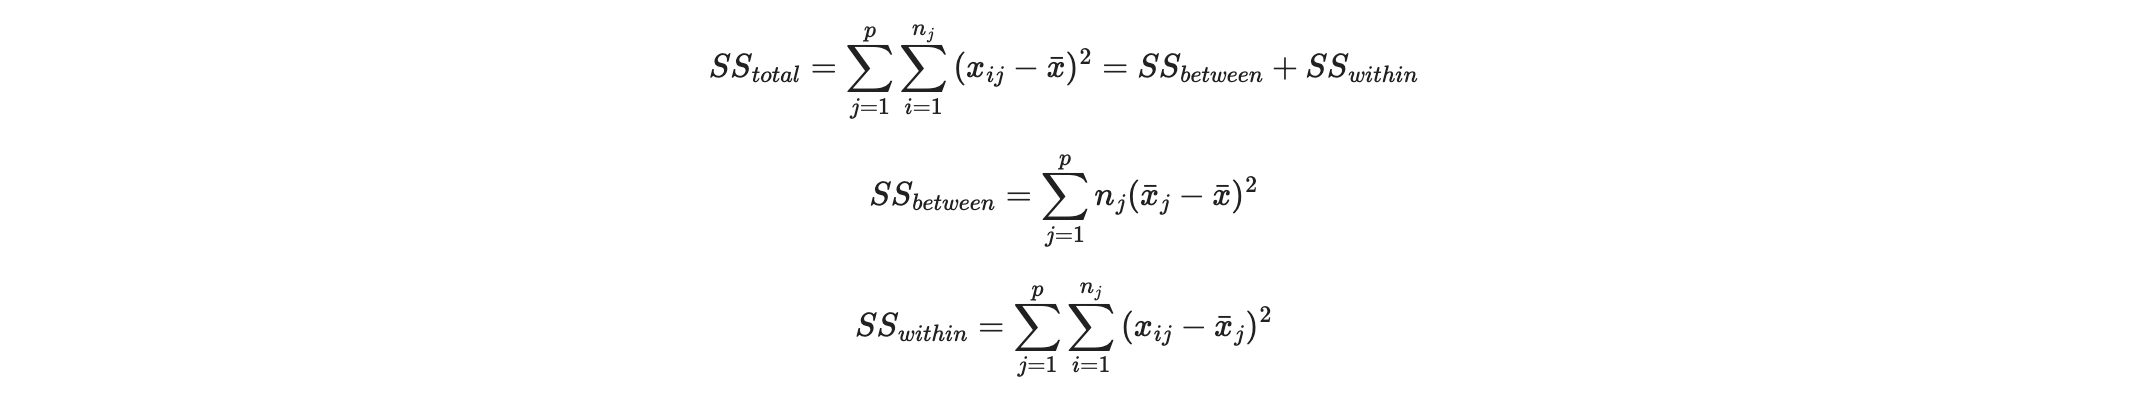

Нульова гіпотеза: a = b = c
Альтернативна гіпотеза: a!=b!=c
Результат:
отклоняем нулевую гипотезу


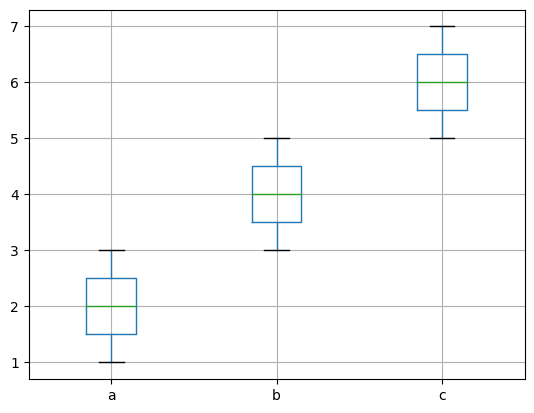

In [33]:
# Імпортування необхідних бібліотек
import pandas as pd
import numpy as np
from scipy import stats

# Вибірки які треба порівняти
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()
print('Нульова гіпотеза: a = b = c\nАльтернативна гіпотеза: a!=b!=c')

# Загальне середнє значення
grand_mean = data.values.flatten().mean()

# відхилення групових середній від загальної середньої
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())

# відхилення значень усередині групи від середньої групи
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups

# міжгруповий середній квадрат
mssb = ssb/dfb

# Внутрішньогруповий середній квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

<h3>Численні порівняння в ANOVA</h3>

На відміну від t-критерію, дозволяє порівнювати середні значення трьох і більше груп. Розроблено Р. Фішером для аналізу результатів експериментальних досліджень. У літературі також зустрічається позначення ANOVA (від англ. ANalysis Of VAriance) – дисперсійний аналіз